# 2. 신경망의 수학적 구성 요소

## 2.1 신경망과의 첫 만남

#### 흑백 손글자 이미지를 10개의 범주로 분류하는 문제

* MNIST 데이터셋을 불러와서 훈련 세트와 테스트 세트 만들고 확인

In [8]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #훈련 세트, 테스트 세트

In [9]:
train_images.shape #훈련 데이터, 테스트 데이터 확인하기
len(train_labels)
train_labels

test_images.shape
len(test_labels)
test_labels

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

* 신경망 만들기

In [10]:
from keras import models
from keras import layers

network = models.Sequential()

#신경망 층 2개
network.add(layers.Dense(512,activation='relu', input_shape=(28*28,)))
network.add(layers.Dense(10,activation='softmax')) #확률 점수가 들어있는 배열 반환하는 소프트맥스 층

* 컴파일 단계

> 손실 함수(신경망 성능 측정하는 방법)   
옵티마이저(네트워크 업데이트)   
훈련과 테스트 과정 모니터링할 지표(지금은 정확도만 고려)

In [11]:
#컴파일
#옵티마이저, 손실함수, 지표(지금은 정확도만 고려)
network.compile(optimizer = 'rmsprop',
               loss='categorical_crossentropy',
               metrics=['accuracy'])

* 이미지 데이터 준비

In [12]:
#0~255 사이의 값인 uint8 타입의 (60000,28,28) 크기 가진 배열 -> 0~1 사이 값 가지는 float32 타입의 (60000,28*28) 크기 배열
train_imgaes = train_images.reshape((60000,28*28))
train_images = train_images.astype('float32')/255

test_images=test_images.reshape((10000,28*28))
test_images = test_images.astype('float32')/255


* 레이블 준비

In [13]:
from keras.utils import to_categorical

#to_categorical: 입력받은 1차원 정수 배열 -> 2차원 배열로 변경
train_labels=to_categorical(train_labels)
test_labels=to_categorical(test_labels)

In [14]:
#학습

network.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5


ValueError: in user code:

    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:806 train_function  *
        return step_function(self, iterator)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:789 run_step  **
        outputs = model.train_step(data)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:747 train_step
        y_pred = self(x, training=True)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:976 __call__
        self.name)
    C:\Users\lim\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\input_spec.py:216 assert_input_compatibility
        ' but received input with shape ' + str(shape))

    ValueError: Input 0 of layer sequential_1 is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 28, 28]


In [15]:
#테스트
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

313/313 [==============================] - 0s 905us/step - loss: 2.3496 - accuracy: 0.0974
test_acc: 0.09740000218153


## 2.2 신경망을 위한 데이터 표현
텐서: 데이터를 위한 컨테이너   
      임의의 차원 개수를 가지는 행렬의 일반화된 모습(텐서에서는 차원을 축이라고도 함)

#### 2.2.1 스칼라(0D 텐서)

스칼라: 하나의 숫자만 담고 있는 텐서   
        넘파이에서는 float32나 float 64 타입의 숫자   


ndim 속성으로 넘파이 배열의 축 개수 확인 가능    
스칼라 텐서의 축 개수는 0   

랭크: 텐서의 축 개수


In [17]:
import numpy as np
x=np.array(12)
print(x)
print(x.ndim)

12
0


#### 2.2.2 벡터(1D 텐서)

벡터: 숫자의 배열
      하나의 축을 가짐
      
      5D 벡터: 하나의 축을 따라 5개의 차원 가진 것
      5D 텐서: 5개의 축을 가진 것

In [18]:
x=np.array([12,3,6,14,7]) #5D 벡터(5차원 벡터)
x.ndim

1

#### 2.2.3 행렬(2D 텐서)

행렬: 벡터의 배열
      2개의 축이 있음(행(가로), 렬(세로))
      

In [19]:
x=np.array([[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]])
x.ndim

2

#### 2.2.4 3D 텐서와 고차원 텐서

3D 텐서: 행렬들을 하나의 새로운 배열로 합친 것(직육면체 형태)

        3D 텐서들 하나의 배열로 합치면 4D 텐서   
        딥러닝에서는 보통 0~4D까지 다룸
        영상 데이터 다룰 때는 5D까지 가기도 함

In [20]:
x=np.array([[[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]],
            [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]],
            [[5,78,2,34,0],
           [6,79,3,35,1],
           [7,80,4,36,2]]])
x.ndim

3

#### 2.2.5 핵심 속성

* 축의 개수(랭크)
* 크기
    파이썬의 튜플   
        행렬의 크기: (3,5)   
        3D 텐서의 크기: (3,3,5)   
        벡터의 크기: (5,)   
        스칼라의 크기: ()
* 데이터 타입(넘파이에서는 dtype에 저장됨)   
        텐서에 포함된 데이터의 타입   
        넘파이 배열은 가변 길이의 문자열 지원 X (텐서는 사전에 할당되어 연속된 메모리에 저장되어야 해서)

In [24]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data() #훈련 세트, 테스트 세트

print(train_images.ndim) #축의 개수 확인
print(train_images.shape) #배열의 크기 확인
print(train_images.dtype) #테이터 타입 확인

#8비트 정수형 3D 텐서

3
(60000, 28, 28)
uint8


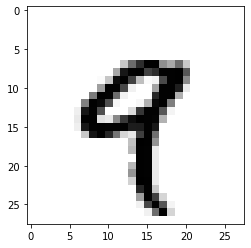

In [26]:
#다섯번째 이미지 출력

digit=train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

#### 2.2.6 넘파이로 텐서 조작하기

슬라이싱: 배열에 있는 특정 원소들 선택하는 것

In [32]:
#11~101번까지 (101번은 포함 X) 숫자 선택해 (90,28,28) 크기의 배열 만듬
my_slice = train_images[10:100]
print(my_slice.shape)

#동일한데 더 자세한 표기법
#각 배열의 축을 따라서 슬라이싱의 시작과 끝 인덱스 지정
#:은 전체 인덱스 선택

my_slicee=train_images[10:100,:,:]
print(my_slicee.shape)

my_sliceee=train_images[10:100,0:28,0:28]
print(my_sliceee.shape)

#오늘쪽 아래 14*14 픽셀 선택
my_slice=train_images[:,14:,14:]

#음수 인덱스
#현재 축의 끝에서 상대적인 위치 나타냄
#정중앙에 위치한 14*14 픽셀 조각 잘라내기

my_slice=train_images[:,7:-7,7:-7]

(90, 28, 28)
(90, 28, 28)
(90, 28, 28)


#### 2.2.7 배치 데이터

샘플 축: 딥러닝에서 사용하는 모든 데이터 텐서의 첫 번째 축 (샘플 차원)   

딥러닝 모델은 데이터를 작은 배치로 나눠서 데이터셋을 처리함

* MNIST에서 크기가 128인 배치 하나   
```
batch=train_images[:128]
```
* 그 다음 배치
```
batch=train_images[128:256]
```
* n번째 배치
```
batch=train_images[128*n:128*(n+1)]
```

첫번째 축(0번 축)을 **배치 축** 또는 **배치 차원**이라고 부름

#### 2.2.8 텐서의 실제 사례

* 벡터 데이터   
    (smaples, features) 크기의 2D 텐서
* 시계열 데이터 또는 시퀀스 데이터   
    (samples, timesteps, features) 크기의 3D 텐서
* 이미지   
    (samples, height, width, channels) 또는 (samples, channels, height, width) 크기의 4D 텐서
* 동영상   
    (samples, frames, height, width, channels) 또는 (samples, frames, channels, height, width) 크기의 5D 텐서

#### 2.2.9 벡터 데이터

대부분의 경우에 해당됨   
하나의 데이터 포인트가 벡터로 인코딩될 수 있음   
배치 데이터는 2D 텐서로 인코딩될 것(벡터의 배열)   
첫 번째 축은 **샘플 축**, 두 번째 축은 **특성 축**   

    ex) 사람의 나이, 우편번호, 소득으로 구성된 인구 통계 데이터.
        10만 명이 포함된 전체 데이터셋은 (100000,3) 크기의 텐서에 저장될 수 있음

#### 2.2.10 시계열 데이터 또는 시퀀스 데이터

데이터에서 시간이 중요할 때에는 시간 축을 포함해 3D 텐서로 저장됨   
시간 축은 항상 두 번째 축(인덱스가 1인 축)   
<img src="https://thebook.io/img/006975/068.jpg" width="25%" height="25%" title="텐서" alt="시계열 데이터 텐서"></img>

    ex) 주식 가격 데이터셋   
        하루 동안의 거래: (390,3) 크기의 2D 텐서로 인코딩됨 (하루 거래 시간이 390분)
        250일치의 데이터: (250,390,3)

#### 2.2.11 이미지 데이터

높이, 너비, 컬러 채널의 3차원으로 이루어짐 (흑백 이미지는 하나의 컬러 채널만을 가져서 2D 텐서로 저장될 수 있음)   
흑백 이미지는 컬러 채널의 차원 크기는 1   

256x256 크기의 흑백 이미지에 대한 128개의 배치: (128,256,256,1)
256x256 크기의 흑백 이미지에 대한 128개의 배치: (128,256,256,3)

<img src="https://tensorflowkorea.files.wordpress.com/2018/12/069.jpg?w=600" width = "25%" height = "25%"></img>

* 채널 마지막 방식(텐서플로에서 사용)
    (samples, height, width, color_depth)
* 채널 우선 방식(씨아노에서 사용)
    (samples, color_depth, height, width)
    
        케라스는 두 형식 모두 지원

#### 2.2.12 비디오 데이터

하나의 비디오는 프레임의 연속, 각 프레임은 하나의 컬러 이미지 -> 5D 텐서

프레임: (height, width, color_depth)   
프레임의 연속: (frames, height, width, color_depth)   
여러 비디오의 배치: (samples, frames, height, width, color_depth)

        ex) 60초짜리 144*256 유튜브 비디오 클립을 초당 4프레임으로 샘플링하면 240 프레임이 됨
            이런 비디오 클립을 4개 가진 배치는
            (4,240,144,256,3)  크기의 텐서에 저장됨
            이 텐서의 dtype를 float32로 했으면 각 값이 32비트로 저장, 텐서의 저장 크기는 405MB
            
<br/>            
<br/>         

***         

## 2.3 신경망의 톱니바퀴: 텐서 연산

심층 신경망이 학습한 모든 변환을 수치 데이터 텐서에 적용하는 몇 종류의 텐서 연산으로 나타낼 수 있음(텐서 덧셈, 텐서 곱셈 등)

#### 2.3.1 원소별 연산

텐서에 있는 각 원소에 독립적으로 적용됨   

relu 함수와 덧셈


#### 2.3.2 브로드캐스팅

크기가 다른 두 텐서 연산할 때 모호하지 않고 실행 가능하다면 작은 텐서가 큰 텐서의 크기에 맞춰 브로드캐스팅됨

1. 큰 텐서의 ndim에 맞도록 작은 텐서에 축이 추가됨
2. 작은 텐서가 새 축을 따라 큰 텐서의 크기에 맞도록 반복됨

        메모리 수준이 아니라 알고리즘 수준에서 일어남

#### 2.3.3 텐서 점곱

(텐서 곱셈) 텐서 점곱: 원소별 연산과 반대로 입력 텐서의 원소들을 결합시킴

넘파이, 케라스, 씨아노, 텐서플로에서 * 연산자 사용

```
z=np.dot(x,y)

z=x·y
```

#### 2.3.4 텐서 크기 변환

특정 크기에 맞게 열과 행을 재배열   
변환된 텐서는 원래 텐서와 원소 개수가 동일함

전치: 행과 열을 바꾸는 것   

    x[i,:]이 x[:,i]가 됨

#### 2.3.5 텐서 연산의 기하학적 해석

모든 텐서 연산은 기하학적 해석이 가능함


#### 2.3.6 딥러닝의 기하학적 해석

신경망을 고차원 공간에서 매우 복잡한 기하학적 변환 하는 것으로 해석 가능

심층 네트워크의 각 층은 데이터를 조금씩 풀어 주는 변환을 적용해 층을 깊게 쌓으면 복잡한 분해 과정 처리 가능


---

## 2.4 신경망의 엔진: 그래디언트 기반 최적화

```
output = relu(dot(W, input) + b)
```

텐서 w와 b는 층의 속성   
가중치 또는 훈련되는 파라미터라고 부름 (커널, 편향(bias)이라고 부르기도 함)

초기에는 가중치 행렬이 작은 난수로 채워져 있음(무작위 초기화 단계)   
-> 처음에는 의미 없는 표현이 만들어짐

##### 훈련 반복 루프   

    1. 훈련 샘플 x와 타깃 y의 배치 추출
    2. x를 사용해 네트워크 실행(정방향 패스 단계), 예측 y_pred를 구함
    3. y_pred와 y의 차이를 측정해 손실 계산
    4. 손실이 감소되도록 모든 가중치 업데이트
    
4단계에서 신경망에서 사용된 모든 연산이 미분 가능하단 것을 이용해 가중치에 대한 손실의 그래디언트를 계산해서 업데이트함   
그래디언트의 반대 방향으로 가중치 이동하면 손실 감소됨

#### 2.4.1 변화율이란?

연속 함수에서의 기울기  

기울기가 음수일 때:   

    p(어떤 포인트)에서 양수 x만큼 이동 -> f(x)가 감소   
    
기울기가 양수일 때:   

    p에서 음수 x만큼 이동 -> f(x)가 감소   
    
기울기의 절댓값(변화율의 크기)은 증가나 감소가 얼마나 빠를지 알려줌    

#### 2.4.2 텐서 연산의 변화율: 그래디언트

텐서 연산의 변화율